In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
X = np.array([1,3,4,5,6,7,9,10,12,23,4,10])
y = np.array([5,8,9,2,4,5,6,7,10,22,7,12])
X = X.reshape(-1,1)

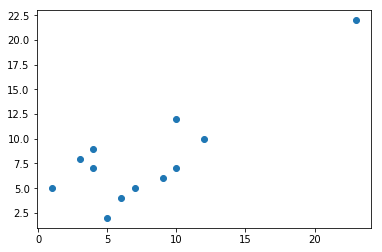

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
model = LinearRegression()

In [7]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print('Slope: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Slope: 
 [0.73624887]
Intercept: 
 2.3160504959422905


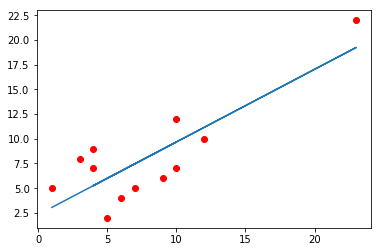

In [14]:
y_pred = model.predict(X)
plt.scatter(X,y,color='r')
plt.plot(X,y_pred)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
mse = mean_squared_error(y,y_pred)

In [17]:
mse

7.71118875864142

In [18]:
var_score = r2_score(y,y_pred)

In [19]:
var_score

0.6840935472989005

In [38]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [22]:
data = load_boston()

In [24]:
data.keys()

dict_keys(['feature_names', 'filename', 'target', 'data', 'DESCR'])

In [37]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [121]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.drop(['CHAS'],1,inplace=True) #dont need categorical data

In [122]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [123]:
X = np.array(df.values.tolist())

In [124]:
y = np.array(data['target'])

In [125]:
scaler = StandardScaler()

In [126]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
scaled_X = scaler.transform(X)

In [128]:
scaled_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [129]:
model = LinearRegression()

In [130]:
model.fit(scaled_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
model.coef_

array([-0.97220878,  1.09629383,  0.27627739, -2.01045796,  2.70274681,
        0.07828211, -3.12467465,  2.85586295, -2.31607571, -2.14324917,
        0.88846521, -3.81068134])

In [132]:
model.intercept_

22.532806324110684

In [133]:
y_pred = model.predict(scaled_X)

In [134]:
mse = mean_squared_error(y,y_pred)
var_score = r2_score(y,y_pred)

In [135]:
mse

22.327578923191634

In [136]:
var_score

0.7355165089722999

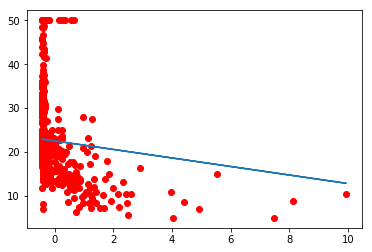

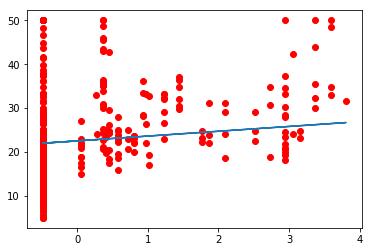

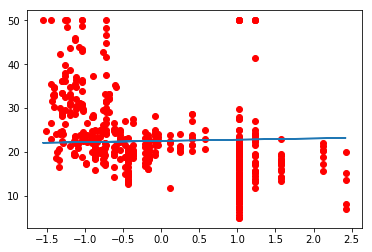

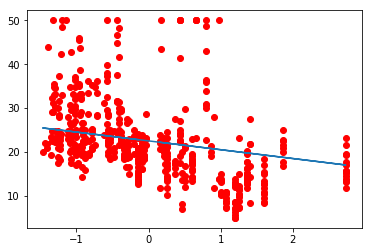

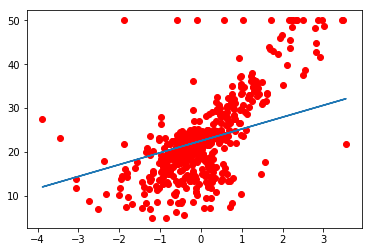

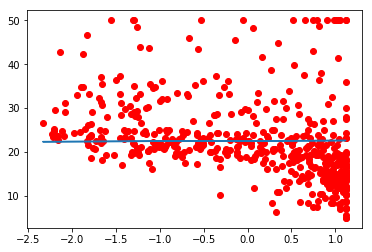

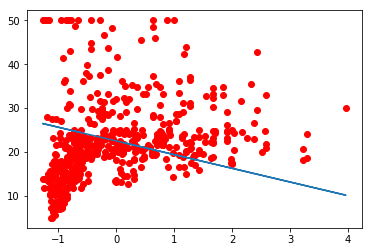

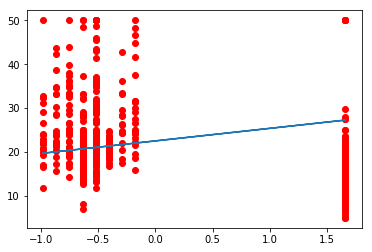

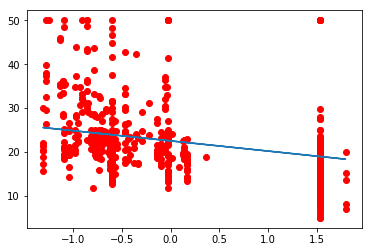

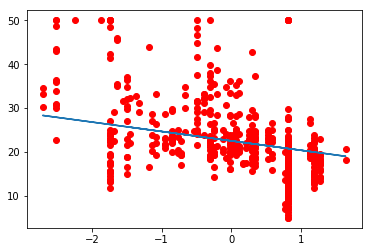

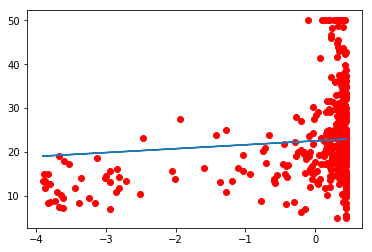

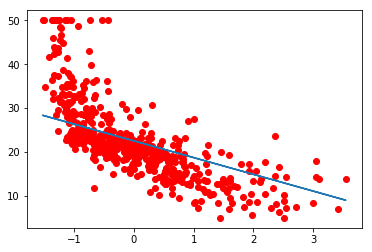

In [138]:
for i in range(len(scaled_X[0])):
    plt.scatter(scaled_X[:,i],y,color='r')
    plt.plot(scaled_X[:,i],model.coef_[i]*scaled_X[:,i] + model.intercept_)
    plt.show()